In [1]:
%pylab inline
import pandas as pd
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Scrape all the data from the website:
#Uncomment to run again - probably not necessary.
'''import subprocess

for yr in tqdm(range(1980,2020)):
    url = f'https://aqs.epa.gov/aqsweb/airdata/annual_conc_by_monitor_{yr}.zip'
    subprocess.call(['wget', url])'''
pass

In [8]:
#Concatenate all the data together
#Uncomment to run again - probably not necessary.

'''dfs = []
for yr in tqdm(range(1980,2020)):
    dpath = f'./data/annual_conc_by_monitor_{yr}.csv'
    df = pd.read_csv(dpath, parse_dates=['Date of Last Change'])
    df.columns = ['_'.join(i.split()) for i in df.columns]
    dfs.append(df)
big = pd.concat(dfs, axis=0)
big.to_csv('all_data.csv')'''
pass


In [9]:
#VERY Large File - will take a while to load.
#big = pd.read_csv('all_data.csv')

In [10]:
def search(term, df = big):
    return [c for c in df.columns if term.lower() in c.lower()]

In [11]:
pollutants = big.Parameter_Name.unique()

In [12]:
search('percentile')

['99th_Percentile',
 '98th_Percentile',
 '95th_Percentile',
 '90th_Percentile',
 '75th_Percentile',
 '50th_Percentile',
 '10th_Percentile']

In [13]:
ozone_report = big[big.Parameter_Name == 'Ozone'].groupby(['Site_Num', 'Date_of_Last_Change'])[['75th_Percentile','50th_Percentile', '10th_Percentile']].mean()

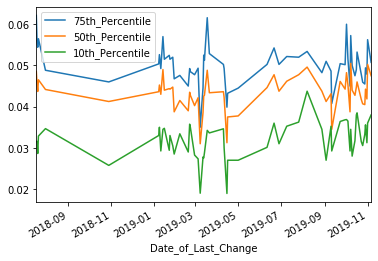

In [14]:
ozone_report.T[5].T.plot(y=['75th_Percentile', '50th_Percentile', '10th_Percentile'])

In [15]:
p_data = []
for pollutant in pollutants[:2]:
    pollutant_report = big[big.Parameter_Name == pollutant].groupby(['Site_Num', 'Date_of_Last_Change'])['50th_Percentile'].mean()
    p_data.append(pollutant_report)

In [45]:
search('state')
ca_ozone = big.groupby(['State_Name', 'Date_of_Last_Change'])['50th_Percentile'].mean().T['California'].T
az_ozone = big.groupby(['State_Name', 'Date_of_Last_Change'])['50th_Percentile'].mean().T['Arizona'].T

In [70]:
ozone_data = big[big.Parameter_Name == 'Ozone']

In [189]:
ozone_data.groupby(['Site_Num', "Date_of_Last_Change"])['50th_Percentile'].mean()

Site_Num  Date_of_Last_Change
1         2018-07-18             0.044096
          2018-07-19             0.047282
          2018-07-20             0.047026
          2018-07-21             0.047781
          2018-07-31             0.046273
                                   ...   
9995      2018-07-19             0.063312
9997      2018-07-20             0.048595
          2019-10-16             0.051250
          2019-11-08             0.049292
9998      2018-07-19             0.059444
Name: 50th_Percentile, Length: 2778, dtype: float64

In [191]:
'''
Hypothesis:
CT and MASS Ozone trend together.
'''
states = ozone_data.Site_Num.unique()
all_state_data = ozone_data.groupby(['Site_Num', 'Date_of_Last_Change'])['50th_Percentile'].mean()
ozone_no_interp = pd.concat([all_state_data.T[state].T for state in states], axis=1)
state_ozone = pd.concat([all_state_data.T[state].T for state in states], axis=1).interpolate(method='linear')
state_ozone.columns=states
ozone_no_interp.columns = states

In [192]:
state_ozone.corr()

,2,1003,5002,6002,14,25,27,28,1,7,...,117,1579,2017,9027,8012,9028,207,65,524,3015
2,1.000000e+00,1.641320e-01,1.574847e-01,-4.605110e-02,1.102639e-01,-1.239758e-01,-1.122869e-01,1.267619e-01,7.681246e-02,1.069554e-01,...,1.199091e-01,2.242871e-01,2.263490e-01,3.100450e-15,2.222937e-01,-3.988170e-02,1.875261e-01,3.184328e-15,-9.977650e-02,NaN
1003,1.641320e-01,1.000000e+00,-1.623558e-01,1.177265e-01,-1.154401e-02,1.368218e-01,-2.489980e-01,-4.976503e-02,1.476390e-01,1.341143e-01,...,1.028731e-01,2.978573e-01,3.374584e-01,-1.147197e-14,2.952499e-01,-2.162479e-01,3.599824e-01,-6.293882e-15,-5.139406e-01,NaN
5002,1.574847e-01,-1.623558e-01,1.000000e+00,5.578482e-02,1.931916e-01,-2.732101e-01,2.506778e-01,6.350370e-02,-2.687576e-01,5.857529e-02,...,-3.840310e-02,8.385938e-03,4.137054e-03,8.194213e-16,7.454578e-03,-1.264703e-01,5.485095e-02,-6.969428e-15,-6.834412e-02,NaN
6002,-4.605110e-02,1.177265e-01,5.578482e-02,1.000000e+00,9.431261e-02,2.088036e-01,6.845373e-01,-3.556676e-01,1.798629e-01,1.957488e-01,...,-7.963493e-01,-3.252470e-01,-1.374097e-01,-1.564051e-15,-3.315146e-01,9.939434e-01,9.545240e-01,1.022144e-15,9.671597e-01,NaN
14,1.102639e-01,-1.154401e-02,1.931916e-01,9.431261e-02,1.000000e+00,-1.399646e-01,1.398199e-01,6.262370e-02,4.706929e-01,-5.705921e-02,...,4.403512e-02,2.661893e-01,3.120445e-01,-1.432449e-15,2.628598e-01,1.727906e-01,2.849988e-01,-1.186860e-15,1.807254e-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9028,-3.988170e-02,-2.162479e-01,-1.264703e-01,9.939434e-01,1.727906e-01,-4.969660e-01,7.441958e-01,-9.996464e-01,2.390953e-01,-2.107519e-01,...,9.963960e-01,9.998246e-01,9.955390e-01,-1.423979e-14,1.000000e+00,1.000000e+00,9.983470e-01,-1.111872e-14,9.864217e-01,NaN
207,1.875261e-01,3.599824e-01,5.485095e-02,9.545240e-01,2.849988e-01,-4.054602e-01,2.973416e-01,-9.995842e-01,2.105175e-01,4.620978e-02,...,9.970628e-01,9.991256e-01,9.966582e-01,-4.859535e-14,9.994814e-01,9.983470e-01,1.000000e+00,5.930722e-14,9.772063e-01,NaN
65,3.184328e-15,-6.293882e-15,-6.969428e-15,1.022144e-15,-1.186860e-15,-4.129369e-15,7.876582e-16,1.412813e-13,-4.864530e-15,-6.684780e-15,...,6.653511e-14,-3.764524e-14,1.826762e-13,1.000000e+00,4.370147e-14,-1.111872e-14,5.930722e-14,1.000000e+00,1.450291e-14,NaN
524,-9.977650e-02,-5.139406e-01,-6.834412e-02,9.671597e-01,1.807254e-01,-4.415062e-01,6.729069e-01,-9.824316e-01,2.345571e-01,-1.212565e-01,...,9.966838e-01,9.890097e-01,9.974982e-01,-5.744561e-14,9.864217e-01,9.864217e-01,9.772063e-01,1.450291e-14,1.000000e+00,NaN


In [193]:
def overlap(s1, s2, thresh = 0.5):
    ol = len(s1.index.intersection(s2.index))
    pcts = (ol/len(s1), ol/len(s2))
    return False not in [p>thresh for p in pcts]

In [194]:
pairings = []
checked = set()
for state1 in tqdm(states):
    for state2 in states:
        if (state1 != state2) and ((state2, state1) not in checked):
            checked.add((state1, state2))
            s1 = all_state_data.T[state1].T
            s2 = all_state_data.T[state2].T
            if overlap(s1, s2, thresh = .55):
                high_ol = pd.concat([s1, s2], axis=1)
                high_ol.columns = [state1, state2]
                pairings.append(high_ol)
len(pairings)

100%|██████████| 427/427 [01:18<00:00,  5.43it/s]


2695

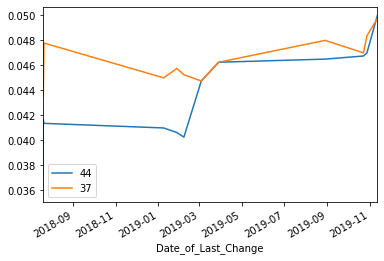

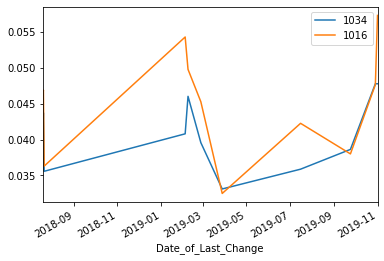

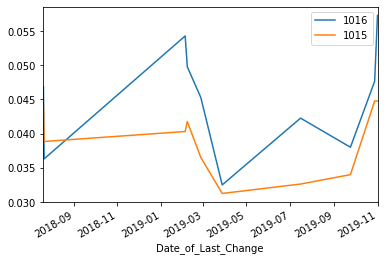

In [197]:
for p in pairings:
    r2 = p.interpolate().corr().values[0,1]
    if (r2 > .7) and (len(p)>10):
        p.interpolate().plot()

In [184]:
len(pollutants)

1150

In [183]:
[print(p) for p in pollutants]

Sulfur dioxide
Ozone
Suspended particulate (TSP)
Hydrogen sulfide
Carbon monoxide
Wind Speed - Scalar
Wind Direction - Scalar
Nitrogen dioxide (NO2)
Arsenic (TSP) STP
Beryllium (TSP) STP
Barium (TSP) STP
Cadmium (TSP) STP
Chromium (TSP) STP
Cobalt (TSP) STP
Copper (TSP) STP
Iron (TSP) STP
Lead (TSP) STP
Manganese (TSP) STP
Molybdenum (TSP) STP
Nickel (TSP) STP
Vanadium (TSP) STP
Zinc (TSP) STP
Nitrate (TSP) STP
Sulfate (TSP) STP
Nitric oxide (NO)
Oxides of nitrogen (NOx)
Total hydrocarbons
Total NMOC (non-methane organic compound)
Methane
Outdoor Temperature
Std Dev Hz Wind Direction
Temperature Difference
Rain/melt precipitation
Benzene soluble organics (TSP)
Benzo[a]pyrene (TSP) STP
Chloride (TSP) STP
Light scatter
Total sulfur
Sulfate PM10 STP
Total Oxidants
Soil index (COH)
Wind Speed - Resultant
Wind Direction - Resultant
Size fractionated particulate
Dew Point
Sulfation rate
Total dustfall (SP)
Fluoride ion
Relative Humidity 
Hydrogen ion conc (TSP) STP
Volume (precip)
PH (precip

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [141]:
pd.concat([indiana, illinois], axis=1).interpolate('linear').corr()

,50th_Percentile,50th_Percentile
50th_Percentile,1.000000,0.534705
50th_Percentile,0.534705,1.000000


In [111]:
ozone_no_interp.isna().sum(0)/ozone_no_interp.fillna(0).count(0)

Alabama                 0.928
Alaska                  0.960
Arizona                 0.892
Arkansas                0.964
California              0.556
Colorado                0.880
Connecticut             0.956
Delaware                0.972
District Of Columbia    0.980
Florida                 0.832
Georgia                 0.944
Hawaii                  0.972
Illinois                0.940
Indiana                 0.924
Iowa                    0.932
Kansas                  0.972
Kentucky                0.908
Louisiana               0.956
Maine                   0.908
Maryland                0.912
Massachusetts           0.972
Michigan                0.916
Minnesota               0.960
Mississippi             0.932
Missouri                0.964
Montana                 0.964
Nebraska                0.952
Nevada                  0.916
New Hampshire           0.952
New Jersey              0.948
New Mexico              0.912
New York                0.944
North Carolina          0.896
North Dako

In [17]:
diffs = pd.concat([r.T[1].T.diff() for r in p_data], axis=1).dropna().diff()

In [18]:
diffs.columns = ['a', 'b']

In [19]:
diffs.a.corr(diffs.b)

-0.13791590122661193